# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn

# from ctgan import CTGAN
# from ctgan import load_demo

from sklearn import model_selection # split함수이용
from sklearn import ensemble # RF,GBM
from sklearn import metrics 

In [2]:
def down_sample_textbook(df):
    df_majority = df[df.is_fraud==0].copy()
    df_minority = df[df.is_fraud==1].copy()
    df_maj_dowsampled = sklearn.utils.resample(df_majority, n_samples=len(df_minority), replace=False, random_state=42)
    df_downsampled = pd.concat([df_minority, df_maj_dowsampled])
    return df_downsampled

ref: https://miruetoto.github.io/yechan3/posts/3_Researches/BORAM/2023-07-03-CTGAN_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C.html

# Data

In [3]:
fraudTrain = pd.read_csv("fraudTrain.csv").iloc[:,1:]
_df1 = fraudTrain[fraudTrain["is_fraud"] == 0].sample(frac=0.20, random_state=42)
_df2 = fraudTrain[fraudTrain["is_fraud"] == 1]
df02 = pd.concat([_df1,_df2])
df50 = down_sample_textbook(df02)
_df50 = df50.assign(Date=list(map(lambda x: x.split(' ')[0],df50['trans_date_trans_time'])),Time=list(map(lambda x: x.split(' ')[1],df50['trans_date_trans_time'])))

In [4]:
_df50

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Date,Time
2449,2019-01-02 1:06,4.613310e+12,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019-01-02,1:06
2472,2019-01-02 1:47,3.401870e+14,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019-01-02,1:47
2523,2019-01-02 3:05,3.401870e+14,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019-01-02,3:05
2546,2019-01-02 3:38,4.613310e+12,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,2019-01-02,3:38
2553,2019-01-02 3:55,3.401870e+14,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,2019-01-02,3:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363827,2019-06-17 19:30,2.475090e+15,fraud_Frami Group,entertainment,81.13,John,Miller,M,153 Mccullough Springs Apt. 857,Lamberton,...,1507,Land/geomatics surveyor,1993-10-12,c66cb411019c7dfd4d89f42a1ba4765f,1339961448,44.212695,-95.661879,0,2019-06-17,19:30
140154,2019-03-17 14:33,2.131550e+14,fraud_Bahringer-Streich,food_dining,55.00,Christopher,Sheppard,M,39218 Baker Shoals,Bristow,...,965,Horticultural therapist,1982-02-10,316b9d25b9fa7d08a6831b7dab6634cd,1331994839,38.394240,-86.413557,0,2019-03-17,14:33
860597,2019-12-17 12:31,2.280870e+15,fraud_Lubowitz-Walter,kids_pets,8.12,Katherine,Cooper,F,3854 Lauren Springs Suite 648,Oakford,...,530,Transport planner,1967-09-23,d92e9e63d9b24c3ccb92d05cba4cac54,1355747517,39.695248,-89.853063,0,2019-12-17,12:31
29341,2019-01-18 9:20,4.878360e+15,fraud_Denesik and Sons,shopping_pos,3.52,Tina,Alvarez,F,1976 Tyler Underpass,Early,...,885,"Pilot, airline",1949-08-14,8390ce51cfb8482b618ebc4ac370bcf7,1326878457,42.633204,-95.598143,0,2019-01-18,9:20


In [5]:
_df50.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'Date', 'Time'],
      dtype='object')

In [6]:
df50['is_fraud'].mean()

0.5

In [7]:
df50['category'].unique()

array(['grocery_pos', 'gas_transport', 'shopping_net', 'misc_net',
       'shopping_pos', 'travel', 'grocery_net', 'misc_pos',
       'health_fitness', 'kids_pets', 'entertainment', 'food_dining',
       'home', 'personal_care'], dtype=object)

In [8]:
_df50_add = _df50.assign(Year = list(map(lambda x: x.split('-')[0],_df50['Date'])),\
                        Mon = list(map(lambda x: x.split('-')[1],_df50['Date'])),\
                        Day = list(map(lambda x: x.split('-')[2],_df50['Date'])),\
                         Hour= list(map(lambda x: x.split(':')[0],_df50['Time'])),\
                         Sec= list(map(lambda x: x.split(':')[1],_df50['Time'])))
_df50_add.Year = _df50_add.Year.astype(np.float64)
_df50_add.Mon = _df50_add.Mon.astype(np.float64)
_df50_add.Day = _df50_add.Day.astype(np.float64)
_df50_add.Hour = _df50_add.Hour.astype(np.float64)
_df50_add.Sec = _df50_add.Sec.astype(np.float64)

In [10]:
_df50_add

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,Date,Time,Year,Mon,Day,Hour,Sec
2449,2019-01-02 1:06,4.613310e+12,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,36.430124,-81.179483,1,2019-01-02,1:06,2019.0,1.0,2.0,1.0,6.0
2472,2019-01-02 1:47,3.401870e+14,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.819364,-99.142791,1,2019-01-02,1:47,2019.0,1.0,2.0,1.0,47.0
2523,2019-01-02 3:05,3.401870e+14,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.273085,-98.836360,1,2019-01-02,3:05,2019.0,1.0,2.0,3.0,5.0
2546,2019-01-02 3:38,4.613310e+12,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,35.909292,-82.091010,1,2019-01-02,3:38,2019.0,1.0,2.0,3.0,38.0
2553,2019-01-02 3:55,3.401870e+14,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.786426,-98.683410,1,2019-01-02,3:55,2019.0,1.0,2.0,3.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363827,2019-06-17 19:30,2.475090e+15,fraud_Frami Group,entertainment,81.13,John,Miller,M,153 Mccullough Springs Apt. 857,Lamberton,...,44.212695,-95.661879,0,2019-06-17,19:30,2019.0,6.0,17.0,19.0,30.0
140154,2019-03-17 14:33,2.131550e+14,fraud_Bahringer-Streich,food_dining,55.00,Christopher,Sheppard,M,39218 Baker Shoals,Bristow,...,38.394240,-86.413557,0,2019-03-17,14:33,2019.0,3.0,17.0,14.0,33.0
860597,2019-12-17 12:31,2.280870e+15,fraud_Lubowitz-Walter,kids_pets,8.12,Katherine,Cooper,F,3854 Lauren Springs Suite 648,Oakford,...,39.695248,-89.853063,0,2019-12-17,12:31,2019.0,12.0,17.0,12.0,31.0
29341,2019-01-18 9:20,4.878360e+15,fraud_Denesik and Sons,shopping_pos,3.52,Tina,Alvarez,F,1976 Tyler Underpass,Early,...,42.633204,-95.598143,0,2019-01-18,9:20,2019.0,1.0,18.0,9.0,20.0


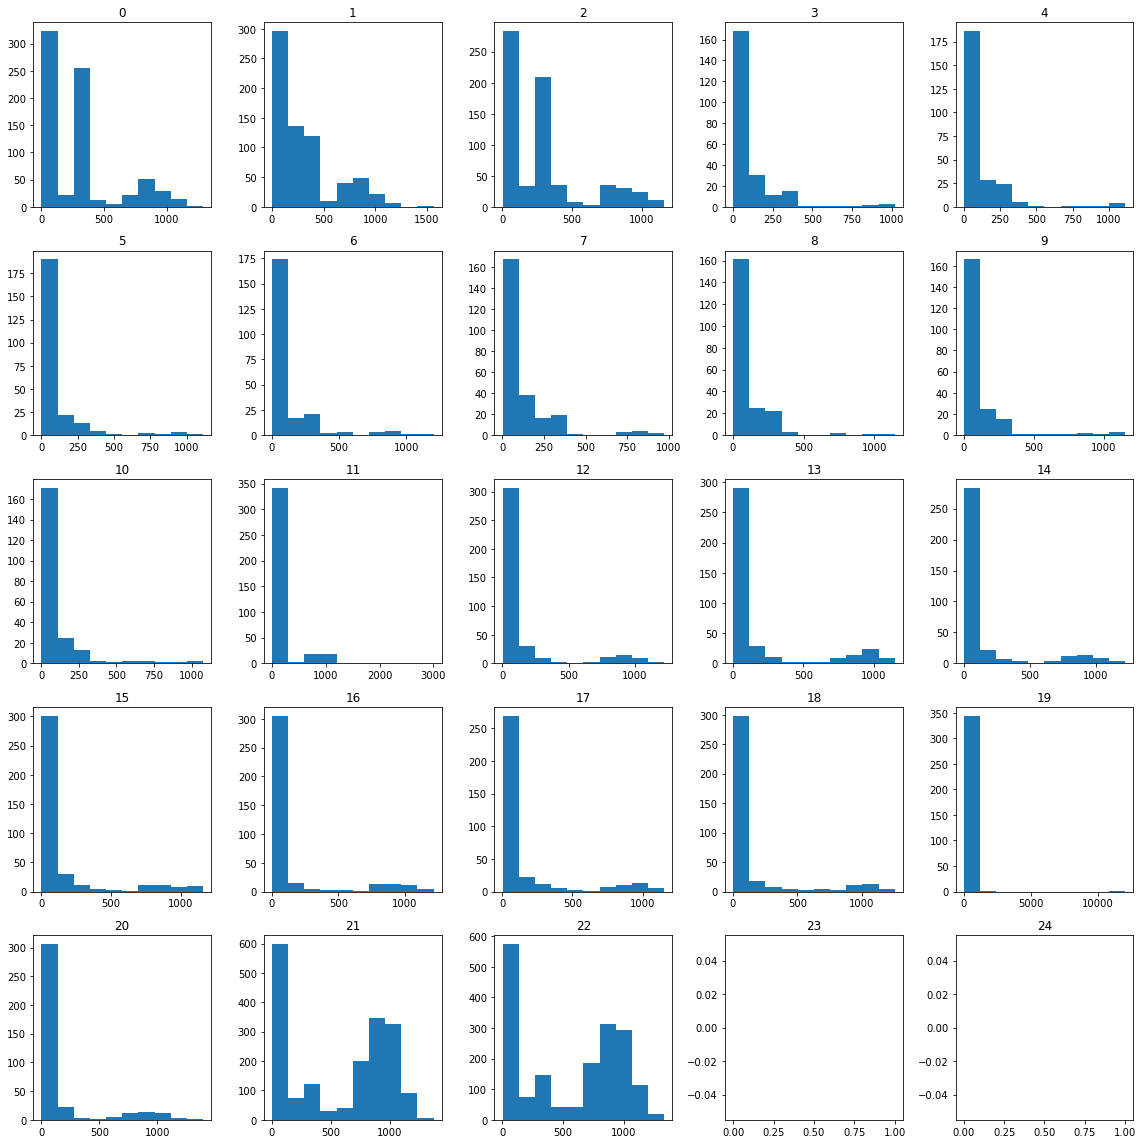

In [12]:
fig,ax =plt.subplots(5,5)
k=0
for i in range(5):
    for j in range(5):
        ax[i][j].hist(_df50_add[(_df50_add['Hour'] > k) & (_df50_add['Hour'] <= k+1)]['amt'])
        # ax[i][j].set_xlim([0,15000])
        ax[i][j].set_title(str(k))
        if k < 24:
            k = k + 1
        else:
            pass
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()

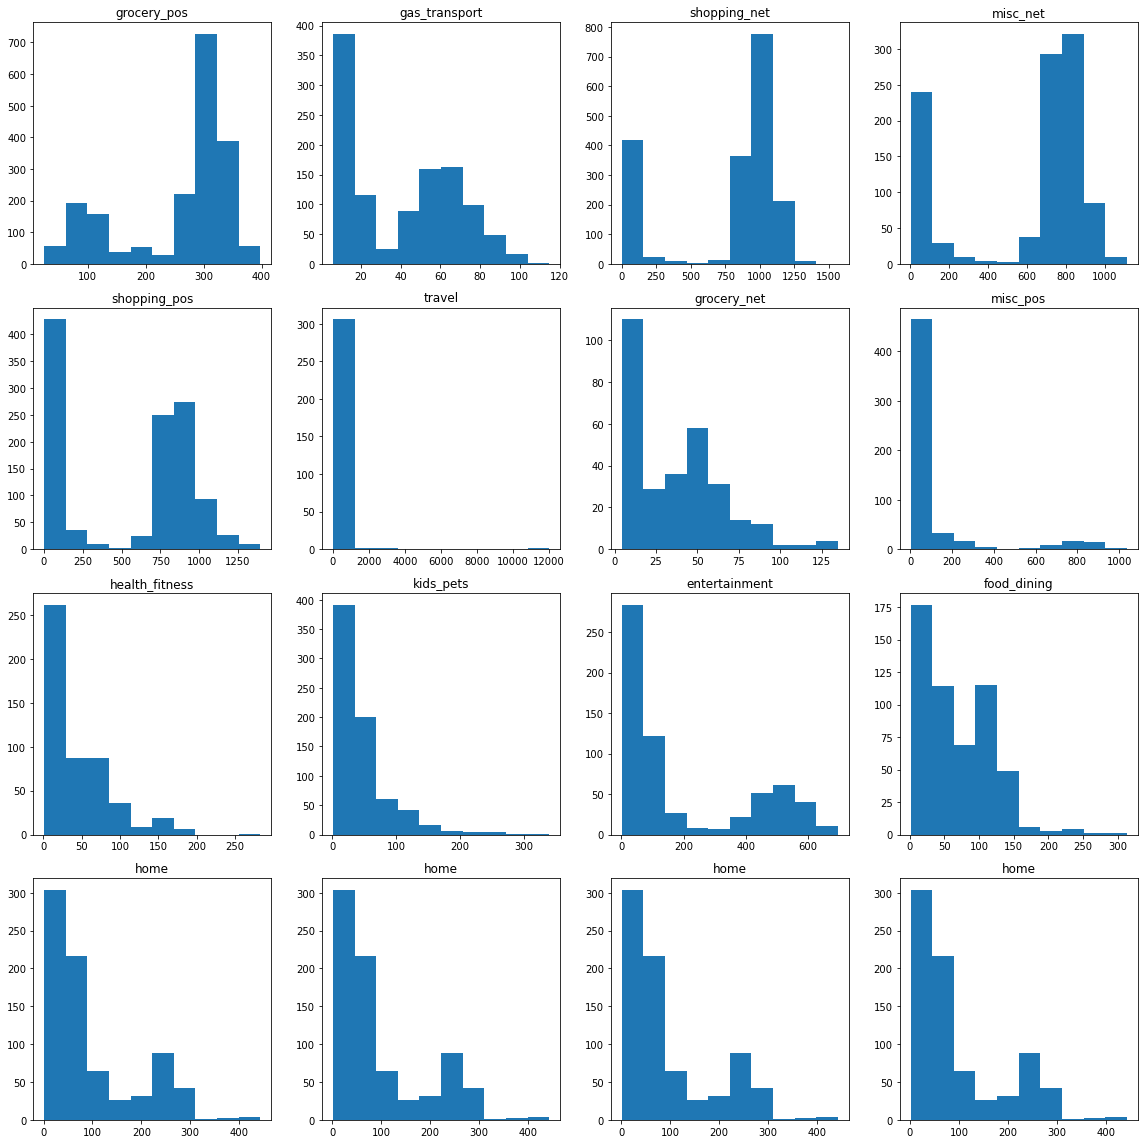

In [13]:
fig,ax =plt.subplots(4,4)
k=0
for i in range(4):
    for j in range(4):
        ax[i][j].hist(df50[df50['category']==df50['category'].unique()[k]]['amt'])
        # ax[i][j].set_ylim([-2,7])
        ax[i][j].set_title(df50['category'].unique()[k])
        if k < 12:
            k = k + 1
        else:
            pass
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()        